## Figure 1 - Volcanic setting of Shinmoe-dake, Kirishima

In [2]:
%matplotlib inline

import os
import numpy as np
from datetime import timedelta, datetime as dt
from scipy.io import loadmat
from matplotlib import pyplot as plt, ticker, dates as mdates
from matplotlib.colors import LightSource
from mintpy.defaults.plot import *
from mintpy.utils import ptime, readfile, utils as ut, plot as pp

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/volcano_setting')
os.chdir(work_dir)
print('Go to directory', work_dir)

e_dates = ptime.date_list2vector(['20080822', '20100710', '20110119'])[0]

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/volcano_setting


### (a-c) - Location and topography of the study area (GMT)

In [3]:
#./dem.sh
#./location.sh
#./data_coverage.sh

### (d-e) - GPS baseline and number of EQs

In [4]:
## Read GPS baseline change
gps_file = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/data/len_960714_950486.mat')
gps_mat = loadmat(gps_file)
gps_lens = gps_mat['Len'].flatten() * 100.
gps_dates = [ptime.datenum2datetime(i) for i in gps_mat['T'].flatten()]
# start from zero
idx = gps_dates.index(dt(2005, 12, 15, 12, 0))
gps_lens -= gps_lens[idx]

## Read Number of EQ
num_eq_file = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/data/EQ_num.txt')
txt_content = np.loadtxt(num_eq_file, dtype=bytes).astype(str)
eq_dates = np.array([dt.strptime(i, '%Y-%m-%d') for i in txt_content[:,0]])
eq_num = txt_content[:,1].astype(np.int16)

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/volcano_setting/ts_gps_eq.png


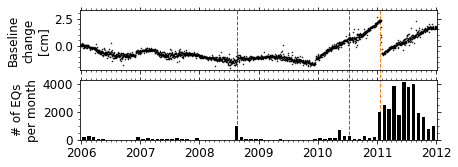

In [5]:
## Plot

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[5.5, 2], sharex=True)

# GPS
ax = axs[0]
ax.scatter(gps_dates, gps_lens, marker='.', color='k', s=1**2)
ax.set_ylabel('Baseline\nchange\n[cm]', fontsize=font_size)

# number of earthquakes
ax = axs[1]
ax.bar(eq_dates + timedelta(days=15), eq_num, width=22, color='k') #shift half a month to display
ax.set_ylabel('# of EQs\nper month', fontsize=font_size)

# plot event dates in dashed lines
#line_colors = [pp.mplColors[0], pp.mplColors[0], pp.mplColors[1]]
for ax in axs:
    ymin = -0.2
    if ax == axs[-1]:
        ymin = 0
    for e_date, e_color in zip(e_dates, [pp.mplColors[0], pp.mplColors[0], pp.mplColors[1]]):
        ax.axvline(x=e_date, ymin=ymin, c=e_color, linestyle='--', linewidth=1, zorder=0, clip_on=False)

# axes format
for ax in axs:
    ax.tick_params(which='both', direction='out', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    ax.set_xlim(dt(2005, 12, 25), dt(2012, 1, 5))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[-1].yaxis.set_major_locator(ticker.MultipleLocator(2000))
fig.subplots_adjust(hspace=0.15, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('ts_gps_eq.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()